7.20795
5.11075
3.31365
2.82965
2.68505
2.42572
2.14275
1.93584
1.74858
1.56998
1.4318
1.37927
1.37077
1.2439
1.20166
1.14863
1.11866
1.05986
1.0449
1.00125
0.955316
0.931354
0.871776
0.896441
0.886089
0.861371
0.845507
0.835989
0.836879
0.832712


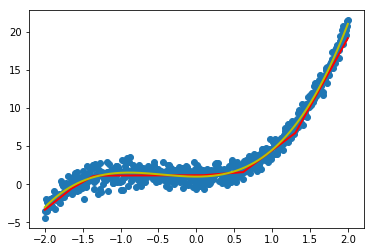

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases #matrix multiply

    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)

    return outputs

### Create Data : poly. + noise
x_data = np.linspace(-2,2,600)[:,np.newaxis]
noise = np.random.normal(0,0.8,x_data.shape)
y_data_ori = 1.5*np.power(x_data,3) + 2*np.power(x_data,2) + 1
# y_data_ori = 2*x_data + 2 * np.sin(x_data/0.5)
y_data = y_data_ori + noise

xs = tf.placeholder(tf.float32,[None,1])
ys = tf.placeholder(tf.float32,[None,1])

### Create NN graph
l1 = add_layer(xs, 1,  10, activation_function=tf.nn.relu)
prediction = add_layer(l1 , 10 , 1 , activation_function=None)

# Set Learning Parameter
loss = tf.reduce_mean(tf.reduce_sum(tf.square(y_data - prediction),reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

# initial tensorflow variables
init = tf.global_variables_initializer()

# initial graph
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
plt.ion()

with tf.Session() as sess:
    sess.run(init)

    for i in range(1500):
        sess.run(train_step, feed_dict={xs:x_data, ys:y_data})

        # predict and plot the result
        if i % 50 ==0:
            print(sess.run(loss,feed_dict={xs:x_data, ys:y_data}))
            try:
                ax.lines.remove(lines[0])
            except Exception:
                pass

            prediction_value = sess.run(prediction, feed_dict={xs: x_data})
            # plot the prediction
            lines = ax.plot(x_data, prediction_value, 'r-', lw=2)

    lines = ax.plot(x_data, y_data_ori,'y-', lw=2)

plt.show()